### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento




In [3]:
faturamento_loja01 = loja['Preço'].sum()
print(faturamento_loja01)

1534509.12


In [4]:
faturamento_loja02 = loja2['Preço'].sum()
print(faturamento_loja02)

1488459.06


In [5]:
faturamento_loja03 = loja3['Preço'].sum()
print(faturamento_loja03)


1464025.03


In [6]:
faturamento_loja04 = loja4['Preço'].sum()
print(faturamento_loja04)


1384497.58


In [7]:
faturamento = {
    'Loja': ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04'],
    'faturamento': [faturamento_loja01 , faturamento_loja02, faturamento_loja03, faturamento_loja04]
}

df = pd.DataFrame(faturamento)
print(df)

      Loja  faturamento
0  Loja 01   1534509.12
1  Loja 02   1488459.06
2  Loja 03   1464025.03
3  Loja 04   1384497.58


      Loja  faturamento  variação media
0  Loja 01   1534509.12            4.54
1  Loja 02   1488459.06            1.40
2  Loja 03   1464025.03           -0.26
3  Loja 04   1384497.58           -5.68


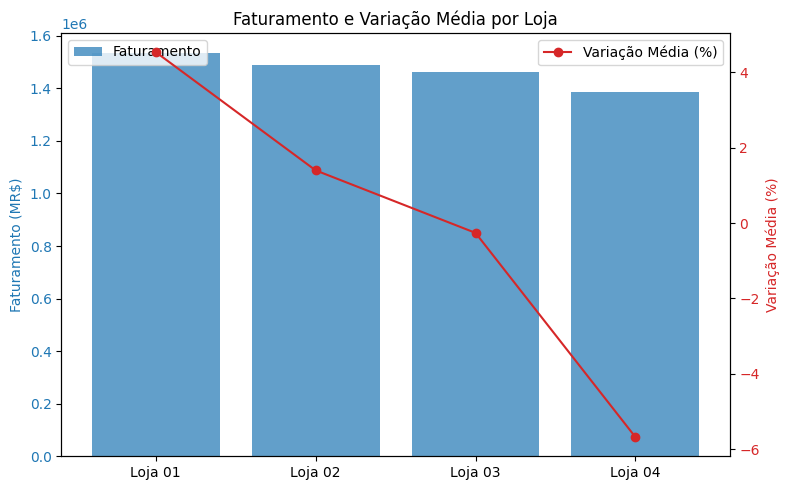

In [8]:
faturamento_medio = df['faturamento'].mean()
df['variação media'] = ((df['faturamento'] - faturamento_medio) / faturamento_medio) * 100
df = df.round(2)
print(df)


fig, ax1 = plt.subplots(figsize=(8,5))


ax1.bar(df['Loja'], df['faturamento'], label='Faturamento', alpha=0.7)
ax1.set_ylabel('Faturamento (MR$)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Faturamento e Variação Média por Loja')


ax2 = ax1.twinx()
ax2.plot(df['Loja'], df['variação media'], color='tab:red', marker='o', label='Variação Média (%)')
ax2.set_ylabel('Variação Média (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



# 2. Vendas por Categoria

Na análise de vendas por categoria, percebemos uma unanimidade entre as quatro lojas em relação as categorias mais e menos populares, a saber: móveis e utilidades domésticas, respectivamente. No tocante a quantidade de vendas por categoria mas popular, a loja 03 apresenta o maior número de vendas(499), enquanto a loja 02 apesenta o menor número de vendas(442).

In [9]:
categoria_vendas_loja1 = loja.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida Loja 01').sort_values(by='Quantidade Vendida Loja 01', ascending=False)
print(categoria_vendas_loja1)


    Categoria do Produto  Quantidade Vendida Loja 01
6                 moveis                         465
2            eletronicos                         448
0             brinquedos                         324
1       eletrodomesticos                         312
3        esporte e lazer                         284
4  instrumentos musicais                         182
5                 livros                         173
7  utilidades domesticas                         171


In [10]:
categoria_vendas_loja2 = loja2.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida Loja 02').sort_values(by='Quantidade Vendida Loja 02', ascending=False)
print(categoria_vendas_loja2)

    Categoria do Produto  Quantidade Vendida Loja 02
6                 moveis                         442
2            eletronicos                         422
0             brinquedos                         313
1       eletrodomesticos                         305
3        esporte e lazer                         275
4  instrumentos musicais                         224
5                 livros                         197
7  utilidades domesticas                         181


In [11]:
categoria_vendas_loja3 = loja3.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida Loja 03').sort_values(by='Quantidade Vendida Loja 03', ascending=False)
print(categoria_vendas_loja3)

    Categoria do Produto  Quantidade Vendida Loja 03
6                 moveis                         499
2            eletronicos                         451
0             brinquedos                         315
1       eletrodomesticos                         278
3        esporte e lazer                         277
5                 livros                         185
4  instrumentos musicais                         177
7  utilidades domesticas                         177


In [12]:
categoria_vendas_loja4 = loja4.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida Loja 04').sort_values(by='Quantidade Vendida Loja 04', ascending=False)
print(categoria_vendas_loja4)

    Categoria do Produto  Quantidade Vendida Loja 04
6                 moveis                         480
2            eletronicos                         451
0             brinquedos                         338
3        esporte e lazer                         277
1       eletrodomesticos                         254
7  utilidades domesticas                         201
5                 livros                         187
4  instrumentos musicais                         170


In [13]:
Categoria_Qtd = {

                 'Categoria' : ['moveis', 'eletronicos', 'brinquedos', 'esporte e lazer', 'eletrodomesticos', 'utilidades domesticas','livros','instrumentos musicais'],
                 'Loja 01' : [465, 488, 324, 312, 284, 182, 173, 171],
                 'Loja 02' : [442, 422, 313, 305, 275, 224, 197, 181],
                 'Loja 03' : [499, 451, 315, 278, 277, 185, 177, 177],
                 'Loja 04' : [480, 451, 338, 277, 254, 201, 187, 170],
}

df = pd.DataFrame(Categoria_Qtd)
print(df)

               Categoria  Loja 01  Loja 02  Loja 03  Loja 04
0                 moveis      465      442      499      480
1            eletronicos      488      422      451      451
2             brinquedos      324      313      315      338
3        esporte e lazer      312      305      278      277
4       eletrodomesticos      284      275      277      254
5  utilidades domesticas      182      224      185      201
6                 livros      173      197      177      187
7  instrumentos musicais      171      181      177      170


# 3. Média de Avaliação das Lojas


A média de avaliação de cada loja aponta para a satisfação do cliente, seja com o produto ou antendimento oferecido. Com isso, a loja 01 apresenta avaliação mais baixa (3.98), enquanto a loja 03 apresenta avaliação mais alta (4.05).

In [14]:
media_avaliacao_loja01 = loja['Avaliação da compra'].mean()
print(f"{media_avaliacao_loja01:.2f}")

3.98


In [15]:
media_avaliacao_loja02 = loja2['Avaliação da compra'].mean()
print(f"{media_avaliacao_loja02:.2f}")


4.04


In [16]:
media_avaliacao_loja03 = loja3['Avaliação da compra'].mean()
print(f"{media_avaliacao_loja03:.2f}")

4.05


In [17]:
media_avaliacao_loja04 = loja4['Avaliação da compra'].mean()
print(f"{media_avaliacao_loja04:.2f}")

4.00


      Loja  Média_Avaliação
2  Loja 03             4.05
1  Loja 02             4.04
3  Loja 04             4.00
0  Loja 01             3.98


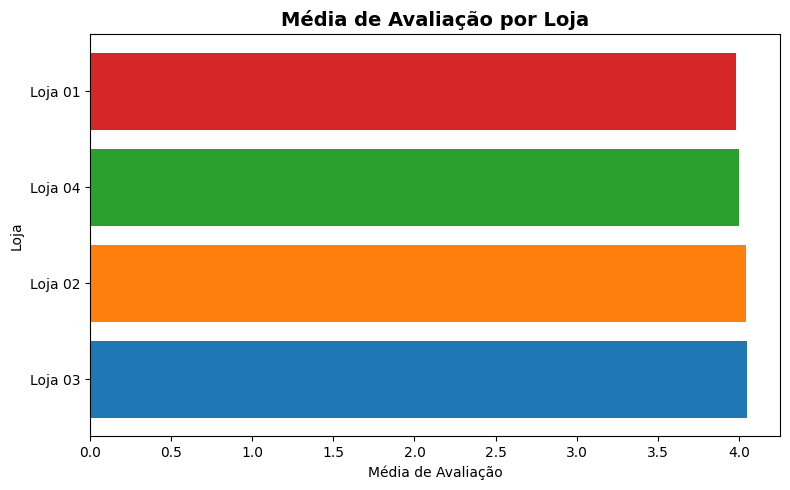

In [18]:
media_geral = {

    'Loja': ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04'],
    'Média_Avaliação':[3.98, 4.04, 4.05, 4.00]
}

df = pd.DataFrame(media_geral).sort_values(by='Média_Avaliação', ascending=False)
print(df)

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8,5))
plt.barh(df['Loja'], df['Média_Avaliação'], color=cores)

plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Média de Avaliação')
plt.ylabel('Loja')



plt.tight_layout()
plt.show()

# 4. Produto mais e menos vendido

In [19]:
categoria_vendas_loja1 = (
    loja.groupby('Produto')
    .agg({
        'Preço': 'first',
        'Produto': 'count'
    })
    .rename(columns={'Produto': 'Quantidade Vendida Loja 01'})
    .reset_index()
    .sort_values(by='Quantidade Vendida Loja 01', ascending=False)
)


print('Top 5:')
print(categoria_vendas_loja1.head())

print('Bottom 5:')
print(categoria_vendas_loja1.tail())


Top 5:
               Produto    Preço  Quantidade Vendida Loja 01
47       TV Led UHD 4K  2522.26                          60
37         Micro-ondas  1009.99                          60
24       Guarda roupas   684.48                          60
43  Secadora de roupas   986.28                          58
3     Blocos de montar    32.26                          56
Bottom 5:
                        Produto   Preço  Quantidade Vendida Loja 01
13  Ciência de dados com python   75.92                          39
40                     Pandeiro  116.95                          36
41            Panela de pressão   88.91                          35
11                 Celular ABXY  935.91                          33
26                      Headset  191.40                          33


In [20]:
categoria_vendas_loja2 = (
    loja2.groupby('Produto')
    .agg({
        'Preço': 'first',
        'Produto': 'count'
    })
    .rename(columns={'Produto': 'Quantidade Vendida Loja 02'})
    .reset_index()
    .sort_values(by='Quantidade Vendida Loja 02', ascending=False)
)


print('Top 5:')
print(categoria_vendas_loja2.head())

print('Bottom 5:')
print(categoria_vendas_loja2.tail())



Top 5:
                     Produto    Preço  Quantidade Vendida Loja 02
28  Iniciando em programação    78.08                          65
37               Micro-ondas   584.44                          62
1                    Bateria  1320.98                          61
49                    Violão   397.84                          58
40                  Pandeiro   102.37                          58
Bottom 5:
              Produto   Preço  Quantidade Vendida Loja 02
22     Fone de ouvido   56.09                          37
42           Poltrona  257.81                          35
27         Impressora  361.83                          34
36     Mesa de jantar  475.03                          34
31  Jogo de tabuleiro  203.95                          32


In [21]:
categoria_vendas_loja3 = (
    loja3.groupby('Produto')
    .agg({
        'Preço': 'first',
        'Produto': 'count'
    })
    .rename(columns={'Produto': 'Quantidade Vendida Loja 03'})
    .reset_index()
    .sort_values(by='Quantidade Vendida Loja 03', ascending=False)
)


print('Top 5:')
print(categoria_vendas_loja3.head())

print('Bottom 5:')
print(categoria_vendas_loja3.tail())


Top 5:
            Produto    Preço  Quantidade Vendida Loja 03
32    Kit banquetas   447.99                          57
36   Mesa de jantar   396.14                          56
9         Cama king  1210.47                          56
17           Cômoda   386.81                          55
30  Jogo de panelas   170.82                          55
Bottom 5:
             Produto   Preço  Quantidade Vendida Loja 03
14      Copo térmico   82.88                          38
37       Micro-ondas  554.75                          36
29     Jogo de copos   52.13                          36
38           Mochila  147.96                          36
3   Blocos de montar   46.27                          35


In [22]:
categoria_vendas_loja4 = (
    loja4.groupby('Produto')
    .agg({
        'Preço': 'first',
        'Produto': 'count'
    })
    .rename(columns={'Produto': 'Quantidade Vendida Loja 04'})
    .reset_index()
    .sort_values(by='Quantidade Vendida Loja 04', ascending=False)
)


print('Top 5:')
print(categoria_vendas_loja4.head())

print('Bottom 5:')
print(categoria_vendas_loja4.tail())


Top 5:
                    Produto   Preço  Quantidade Vendida Loja 04
8                  Cama box  631.70                          62
20                 Faqueiro   75.58                          59
9                 Cama king  674.87                          56
18  Dashboards com Power BI   47.99                          56
17                   Cômoda  364.39                          55
Bottom 5:
               Produto    Preço  Quantidade Vendida Loja 04
23           Geladeira  2122.48                          38
34  Lavadora de roupas  1949.23                          38
49              Violão   424.00                          37
24       Guarda roupas   601.39                          34
25            Guitarra   834.88                          33


# 5. Frete Médio por Loja

In [23]:
custo_frete_loja01 = loja['Frete'].mean()
print(f"{custo_frete_loja01:.2f}")

34.69


In [24]:
custo_frete_loja02 = loja2['Frete'].mean()
print(f"{custo_frete_loja02:.2f}")

33.62


In [25]:
custo_frete_loja03 = loja3['Frete'].mean()
print(f"{custo_frete_loja03:.2f}")

33.07


In [26]:
custo_frete_loja04 = loja4['Frete'].mean()
print(f"{custo_frete_loja04:.2f}")

31.28


## Relatório Final

Para se manter um negócio sustentável e competitivo, precisamos dar atenção a três pilares fundamentais: financeiro, pessoas e processos. Direcionado por estes pilares, este relatório de análise de nogócio tem por objetivo apontar a loja mais ineficiente e menos competitiva. Segue análise realizada:

# 1. Financeiro


## 1.1 Análise de Faturamento

**A loja 04** apresenta o **menor faturamento estimado (R$ 1.384.497,58)**, com uma **variação média negativa de (-5,68)** em relação a média total do faturamento estimado.

## 1.2 Vendas por Categoria
Em relação a venda por categoria, há uma unanimidade na categoria mais vendida, a saber: **móveis**. No entanto, os produtos dentro desta categoria apresentam uma precificação distinta,e consequente faturamento. Deste ponto de vista, a **loja 02** apresenta o menor faturamento dentro da categoria móveis. No entanto, tem o 2º maior faturamento devido as vendas consolidadas em outras categorias.

# 2.Pessoas

## 2.1 Avaliação média por Loja

No que corresponde avaliação média por loja, concluimos que a **loja 01** possui a **menor avaliação (3,98)**, com uma **variação média de (0,75)**. Um dos fatores decisivo desta nota de avaliação é o frete médio cobrado pela loja 01, gerando algumas insatisfações. No entanto, o faturamento mostra que apesar destes fatores, há muitas vendas com uma clientela consolidada.

# Conclusão

Diante da análise de negócio realizada, concluimos que a **loja 04** deve ser selecionada para venda. O Fator decisivo é o seu **faturamento** mais baixo. Em relação a loja 02 no aspecto de produtos mais vendidos por categorias, a loja 04, apresenta o 2º menor faturamento dentro da categoria móveis. Em relação a loja 01, no aspecto de avaliação média por loja, a diferença de pontos é igual a 0,02, uma diferença insignificante em relação ao faturamento das duas lojas.



In [28]:
df.to_csv('análise de negocios.csv', index=False)